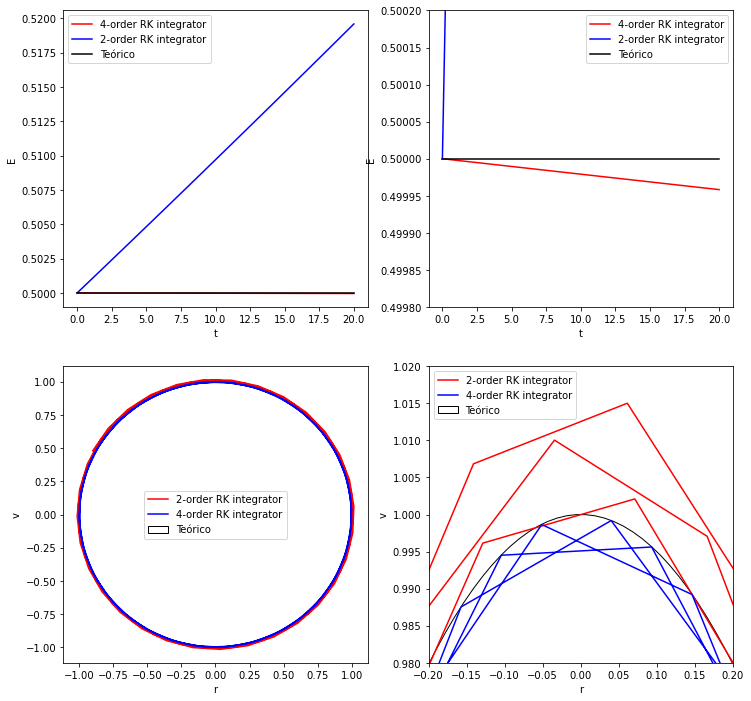

In [76]:
import matplotlib.pyplot as plt
import numpy as np
# q' = p
# p' = -q

def F(q, p, x):
    return -q

a, b = 0, 20.0
n = 101
h = (b-a)/n

t = np.linspace(a,b,n)
p4, q4 = np.zeros(n), np.zeros(n)
p2, q2 = np.zeros(n), np.zeros(n)
Et = np.ones(n)*0.5
q, qq = 1, 1
p, pp = 0, 0



for i in range(len(t)):
    x = t[i]
    #Orden 2
    q2[i] = qq
    p2[i] = pp
    
    m1 = h*pp
    k1 = h*F(qq, pp, x)

    m2 = h*(pp + k1)
    k2 = h*F(qq+m1, pp+k1, x+h)

    qq += (m1 + m2)/2
    pp += (k1 + k2)/2

    #Orden 4
    q4[i] = q
    p4[i] = p
    
    m1 = h*p
    k1 = h*F(q, p, x)

    m2 = h*(p + 0.5*k1)
    k2 = h*F(q+0.5*m1, p+0.5*k1, x+0.5*h)

    m3 = h*(p + 0.5*k2)
    k3 = h*F(q+0.5*m2, p+0.5*k2, x+0.5*h)

    m4 = h*(p + k3)
    k4 = h*F(q+m3, p+k3, x+h)

    q += (m1 + 2*m2 + 2*m3 + m4)/6
    p += (k1 + 2*k2 + 2*k3 + k4)/6

def acceleration(r,v):
    return -r

def Simplectic(CI,t0, tf, N, acc, order = 2):
    t = np.linspace(t0, tf, N)
    h = (t[-1]-t[0])/(N-1)
    r = np.zeros(N)
    v = np.zeros(N)
    a = np.zeros(N)
    
    #Se inicializan las condiciones iniciales
    r[0] = CI[0]
    v[0] = CI[1]
    a[0] = acc(r[0], v[0])
    
    
    #Definimos los coeficientes
    if order == 4:
        x1 = 1/((2-2**(1/3)))
        x0 = -(2**(1/3))/((2-2**(1/3)))
        xx = [x1, x0, x1]
    
    else:
        xx = [1]

    #Se aplica la relación de recurrencia del integrador
    for i in range(N-1):
        rj = r[i]
        vj = v[i]
        #De acuerdo a lo que inidicaba el paper, se tenía que para el operador 
        #Simpléctico de orden 4 S4(h) se debe aplicar tres veces el operador S2, simplectico de orden 2
        #3 veces segúidas con distintos coeficientes. Así, S4(h) = S2(x1*h)S2(x0*h)S2(x1*h), donde x1 y x0, son 
        # los coeficientes indicados anteriormente. Además, S2(h) = exp(0.5*h*B)exp(h*A)exp(0.5*h*B), donde A y B son
        # A = v cdot grad_r y B = a cdot grad_v . 
        
        #En cada iteración del siguiente del siguiente for 
        #transforma a r_n y v_n por medio del operador S2(xx[j]*h)
        
        for j in range(len(xx)):
            #Las variables con p indican el pasado
            rp = rj 
            vp = vj
            ap = acc(rj, vj)
            rj = (rp + (vp + xx[j]*ap*h/2)*xx[j]*h)   
            vj = vp + ap*h/2*xx[j] + acc(rj, vj)*xx[j]*h/2
    
        v[i+1] = vj
        r[i+1] = rj
        a[i+1] = acc(rj, vj)
    
    if( i == 0):
        r[i+1] = r[i] + v[i]*h
        v[i+1] = v[i] + a[i]*h
        a[i+1] = acc(r[i+1], v[i+1])
        
    U = 0.5*r**2
    K = 0.5*v**2
    return U, K, t, r, v,a #Se retornan las energías y r,v,a

U4 = 0.5*q4**2
K4 = 0.5*p4**2
E4 = U4 + K4

U2 = 0.5*q2**2
K2 = 0.5*p2**2
E2 = U2 + K2

fig = plt.figure(figsize =(12,12))

ax1 = fig.add_subplot(2,2,1)
ax1.plot(t,E4, color="red", label = "4-order RK integrator")
ax1.plot(t,E2, color="blue", label = "2-order RK integrator")
ax1.plot(t,Et, color="black", label = "Teórico")

ax1.set_xlabel("t")
ax1.set_ylabel("E")
ax1.legend()


ax2 = fig.add_subplot(2,2,2)
ax2.plot(t,E4, color="red", label = "4-order RK integrator")
ax2.plot(t,E2, color="blue", label = "2-order RK integrator")
ax2.plot(t,Et, color="black", label = "Teórico")

ax2.set_xlabel("t")
ax2.set_ylabel("E")
ax2.set_ylim(0.4998, 0.5002)
ax2.legend()


ax3 = fig.add_subplot(2,2,3)
ax3.plot(p2,q2, color="red", label = "2-order RK integrator")
ax3.plot(p4,q4, color="blue", label = "4-order RK integrator")
teo = plt.Circle((0,0), radius=1, fill=False, color="black", label = "Teórico")
ax3.add_patch(teo)
ax3.set_xlabel("r")
ax3.set_ylabel("v")
ax3.legend()

ax4 = fig.add_subplot(2,2,4)
ax4.plot(q2,p2, color="red", label = "2-order RK integrator")
ax4.plot(q4,p4, color="blue", label = "4-order RK integrator")
teo = plt.Circle((0,0), radius=1, fill=False, color="black", label = "Teórico")
ax4.add_patch(teo)
ax4.set_xlabel("r")
ax4.set_ylabel("v")
ax4.set_ylim(0.98, 1.02)
ax4.set_xlim(-0.2, 0.2)
ax4.legend()



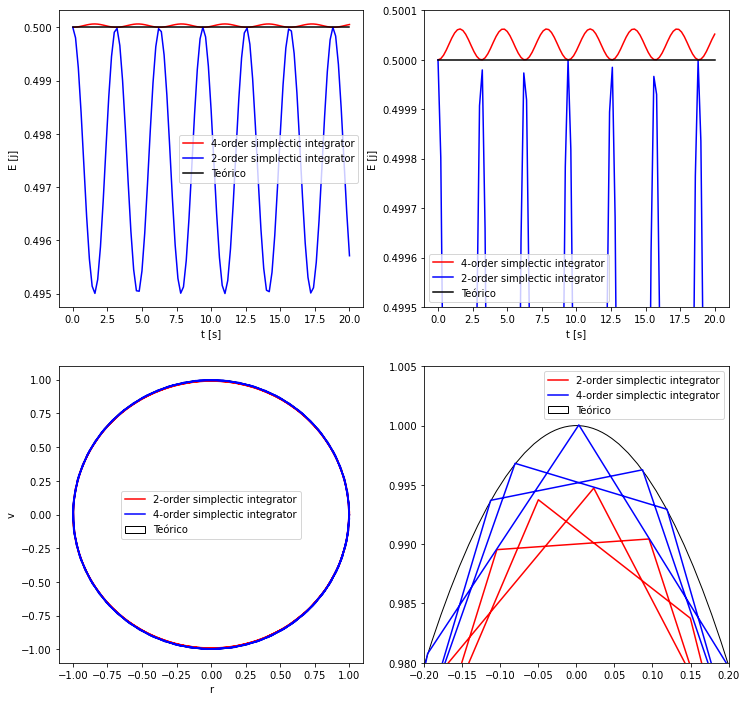

In [77]:
t0, tf = 0, 20
N = 101
r0 = [1,0]
U4, K4, t4, r4, v4, a4 = Simplectic(r0, t0, tf, N, acceleration, order = 4)
U2, K2, t2, r2, v2, a2 = Simplectic(r0, t0, tf, N, acceleration, order = 2)
    
E4 = U4 + K4
E2 = U2 + K2

fig = plt.figure(figsize =(12,12))
ax1 = fig.add_subplot(2,2,1)
ax1.plot(t4,E4, color="red", label = "4-order simplectic integrator")
ax1.plot(t2,E2, color="blue", label = "2-order simplectic integrator")
ax1.plot(t,Et, color="black", label = "Teórico")
ax1.set_xlabel("t [s]")
ax1.set_ylabel("E [j]")
ax1.legend()


ax2 = fig.add_subplot(2,2,2)
ax2.plot(t4,E4, color="red", label = "4-order simplectic integrator")
ax2.plot(t2,E2, color="blue", label = "2-order simplectic integrator")
ax2.plot(t,Et, color="black", label = "Teórico")
ax2.set_xlabel("t [s]")
ax2.set_ylabel("E [j]")
ax2.set_ylim(0.4995, 0.5001)
ax2.legend()

ax3 = fig.add_subplot(2,2,3)
ax3.plot(r2,v2, color="red", label = "2-order simplectic integrator")
ax3.plot(r4,v4, color="blue", label = "4-order simplectic integrator")
teo = plt.Circle((0,0), radius=1, fill=False, color="black", label = "Teórico")
ax3.add_patch(teo)
ax3.set_xlabel("r")
ax3.set_ylabel("v")
ax3.legend()


ax4 = fig.add_subplot(2,2,4)
ax4.plot(r2,v2, color="red", label = "2-order simplectic integrator")
ax4.plot(r4,v4, color="blue", label = "4-order simplectic integrator")
teo = plt.Circle((0,0), radius=1, fill=False, color="black", label = "Teórico")
ax4.add_patch(teo)
ax3.set_xlabel("r")
ax3.set_ylabel("v")
ax4.set_ylim(0.98, 1.005)
ax4.set_xlim(-0.2, 0.2)
ax4.legend()
